In [26]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import svm
from sklearn.metrics import accuracy_score
import os
import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['finaldata']


In [27]:
data = pd.read_csv('../input/finaldata/YouTube_Dadvar_2014.csv')

In [28]:
data.head()

,UserIndex,Comments,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Class,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.shape

(3464, 38)

In [30]:
data.ndim

2

In [31]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.shape

(3464, 9)

In [32]:
data.dtypes

UserIndex                object
Comments                 object
Number of Comments        int64
Number of Subscribers     int64
Membership Duration       int64
Number of Uploads         int64
Profanity in UserID       int64
Age                       int64
Class                     int64
dtype: object

In [33]:
data.isnull().any()

UserIndex                False
Comments                 False
Number of Comments       False
Number of Subscribers    False
Membership Duration      False
Number of Uploads        False
Profanity in UserID      False
Age                      False
Class                    False
dtype: bool

In [34]:
data.columns

Index(['UserIndex', 'Comments', 'Number of Comments', 'Number of Subscribers',
       'Membership Duration', 'Number of Uploads', 'Profanity in UserID',
       'Age', 'Class'],
      dtype='object')

In [35]:
data_dupli = data.drop_duplicates()
data=data_dupli
data.describe()

,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,Class
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.00000
mean,15.452367,304.318995,3.714781,10.288395,0.113164,24.879042,0.12067
std,10.862517,15520.532319,1.392837,28.646525,0.316839,13.286361,0.32579
min,1.000000,0.000000,2.000000,1.000000,0.000000,13.000000,0.00000
25%,6.000000,0.000000,3.000000,5.000000,0.000000,18.000000,0.00000
50%,14.000000,2.000000,3.000000,5.000000,0.000000,21.000000,0.00000
75%,23.000000,7.000000,4.000000,5.000000,0.000000,27.000000,0.00000
max,50.000000,912377.000000,9.000000,820.000000,1.000000,112.000000,1.00000


In [36]:
from sklearn.preprocessing import LabelEncoder
data['Class']=data['Class'].astype(str)
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

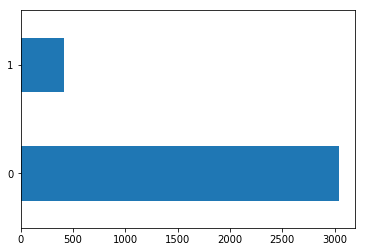

In [37]:
data['Class'].value_counts().plot(kind='barh')

In [38]:
import kernelprocess

df = kernelprocess.processing(data)
df.head()

,Comments,Class
0,do nebodyels hear crazi as screamin hoe every...,0
1,there mani thing incorrect comment unbeliev g...,0
2,hahah boyfriend show song me tooo be seizur o...,1
3,dick beyonc fuck as hole trueli dog bitch pha...,1
4,donghaetaemin kai a luhansehun bacon xd taemi...,0


In [39]:
from sklearn.utils import shuffle
file = shuffle(df, random_state=3)
Y = pd.DataFrame(file['Class'])
X = pd.DataFrame(file['Comments'])

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=4, random_state=42)

In [41]:
tfidf = TfidfVectorizer(ngram_range=(1,2)).fit_transform(X['Comments'].values)
y=Y['Class'].values

def Baseline(y, cv, tfidf):
    #SVM with tf-idf
    for train, test in cv.split(tfidf):  
        
        Xtrain, Xtest = tfidf[train], tfidf[test]
        Ytrain, Ytest = y[train], y[test]
        #ramdomOverSample
        from imblearn.over_sampling import RandomOverSampler
        ros = RandomOverSampler()
        x_ros, y_ros = ros.fit_sample(Xtrain, Ytrain)
        
        SVM = svm.SVC(C=1.0, kernel='linear')
        SVM.fit(x_ros, y_ros)
        
        predict_SVM = SVM.predict(Xtest)
    print("-----RandomOverSampling-----")
    print(classification_report(Ytest, predict_SVM))
    return (x_ros,y_ros,Ytest, SVM, predict_SVM)
    

In [42]:
x_ros,y_ros,Ytest, SVM, predict_SVM = Baseline(y, cv,tfidf)
scoreSVM = cross_val_score(SVM, x_ros, y_ros, cv=4, scoring='accuracy')
print("SVM Accuracy Score -> ",np.mean(scoreSVM)*100)
print(confusion_matrix(Ytest,predict_SVM))

-----RandomOverSampling-----
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       760
           1       0.57      0.04      0.07       106

    accuracy                           0.88       866
   macro avg       0.73      0.52      0.50       866
weighted avg       0.84      0.88      0.83       866

SVM Accuracy Score ->  99.38772917100411
[[757   3]
 [102   4]]


In [43]:

def Baseline(y, cv, tfidf):
    #SVM with tf-idf
    for train, test in cv.split(tfidf):  
        #print("TRAIN:", train, "Test:", test)
        X_train, X_test = tfidf[train], tfidf[test]
        y_train, y_test = y[train], y[test]
        #smote
        from imblearn.over_sampling import SMOTE
        sm = SMOTE(random_state=2)
        X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
        
        SVM = svm.SVC(C=1.0, kernel='linear')
        SVM.fit(X_train_res,y_train_res)
        
        predict_SVM = SVM.predict(X_test)
    print("-----SMOTE-----")
    print(classification_report(y_test, predict_SVM))
    return (X_train_res,y_train_res,y_test, SVM, predict_SVM)
    

In [44]:
X_train_res,y_train_res,y_test, SVM, predict_SVM = Baseline(y, cv,tfidf)
scoreSVM = cross_val_score(SVM, X_train_res, y_train_res, cv=4, scoring='accuracy')
print("SVM Accuracy Score -> ",np.mean(scoreSVM)*100)
print(confusion_matrix(y_test,predict_SVM))

-----SMOTE-----
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       760
           1       0.40      0.04      0.07       106

    accuracy                           0.88       866
   macro avg       0.64      0.51      0.50       866
weighted avg       0.82      0.88      0.83       866

SVM Accuracy Score ->  95.88755159026613
[[754   6]
 [102   4]]


In [45]:

def Baseline(y, cv, tfidf):
    #SVM with tf-idf
    for train, test in cv.split(tfidf):  
        
        Xtrain, Xtest = tfidf[train], tfidf[test]
        Ytrain, Ytest = y[train], y[test]
        #ramdomUnderSample
        from imblearn.under_sampling import RandomUnderSampler

        rus = RandomUnderSampler()
        x_rus, y_rus = rus.fit_sample(Xtrain, Ytrain)
        
        SVM = svm.SVC(C=1.0, kernel='linear')
        SVM.fit(x_rus, y_rus)
        
        predict_SVM = SVM.predict(Xtest)
    print("-----RandomUnderSampling-----")
    print(classification_report(Ytest, predict_SVM))
    return (x_rus,y_rus,Ytest, SVM, predict_SVM)
    

In [46]:
x_rus,y_rus,Ytest, SVM, predict_SVM = Baseline(y, cv,tfidf)
scoreSVM = cross_val_score(SVM, x_rus, y_rus, cv=4, scoring='accuracy')
print("SVM Accuracy Score -> ",np.mean(scoreSVM)*100)
print(confusion_matrix(Ytest,predict_SVM))

-----RandomUnderSampling-----
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       760
           1       0.23      0.56      0.32       106

    accuracy                           0.71       866
   macro avg       0.57      0.64      0.57       866
weighted avg       0.84      0.71      0.76       866

SVM Accuracy Score ->  64.58333333333334
[[557 203]
 [ 47  59]]


In [50]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=4, random_state=42)

In [51]:
def Baseline(y, cv, tfidf):
    #SVM with tf-idf
    for train, test in cv.split(tfidf,y):  
        
        Xtrain, Xtest = tfidf[train], tfidf[test]
        Ytrain, Ytest = y[train], y[test]
        
        SVM = svm.SVC(C=1.0, kernel='linear')
        SVM.fit(Xtrain, Ytrain)
        
        predict_SVM = SVM.predict(Xtest)
    print("-----StratifiedKFold-----")
    print(classification_report(Ytest, predict_SVM))
    return (Xtrain, Ytrain,Ytest, SVM, predict_SVM)
    

In [52]:
Xtrain, Ytrain,Ytest, SVM, predict_SVM = Baseline(y, cv,tfidf)
scoreSVM = cross_val_score(SVM,Xtrain, Ytrain, cv=4, scoring='accuracy')
print("SVM Accuracy Score -> ",np.mean(scoreSVM)*100)
print(confusion_matrix(Ytest,predict_SVM))

-----StratifiedKFold-----
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       761
           1       0.00      0.00      0.00       104

    accuracy                           0.88       865
   macro avg       0.44      0.50      0.47       865
weighted avg       0.77      0.88      0.82       865



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


SVM Accuracy Score ->  87.9184993064162
[[761   0]
 [104   0]]
